# Part I - Ford GoBike Data Exploration
## by Ruth Jepngetich Kibor

## Introduction
> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.The data has the following columns:
- Start date and time - "start_date: start date of trip with date and time"
- Start station location - "start_station: station id of start station"
- End date and time - "end_date: end date of trip with date and time"
- End station location - "end_station_id: station id of end station"
- Bike number - "bike_nr: id of bicycle used"
- Membership type - "subscription_type: (should be cognizant of varying membership types)"
- age of member (of registered user) - "birth_date: birth year of user"
- gender of member (of registered user) - "gender: gender of user"


## Preliminary Wrangling


In [289]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [290]:
# Loading dataset using pd.read_csv()
fordbike= pd.read_csv("201902-fordgobike-tripdata.csv")
print(fordbike.shape)
print(fordbike.head())

(183412, 16)
   duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:20:44.0740   

   start_station_id                                start_station_name  \
0              21.0  Montgomery St BART Station (Market St at 2nd St)   
1              23.0                     The Embarcadero at Steuart St   
2              86.0                           Market St at Dolores St   
3             375.0                           Grove St at Masonic Ave   
4               7.0                               Frank H Ogawa Plaza   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.789625              -122.400811 

The data contains 183412 rows and 16 columns.

In [291]:
# Data types of the columns
fordbike.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [292]:
# Summary statistics for numerical data
fordbike.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [293]:
# Checking null values
fordbike.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [294]:
# Dropping null values in columns with null values
col= ['start_station_id','start_station_name','end_station_id','end_station_name', 'member_birth_year','member_gender']
fordbike.dropna(subset=col, inplace= True)
print(fordbike.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null object
end_time                   174952 non-null object
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.7+ MB
None


In [295]:
#Checking if there are any null values left
fordbike.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [296]:
# Changing the start date and end date to datetime objects instead of objects
#https://stackoverflow.com/questions/35595710/splitting-timestamp-column-into-separate-date-and-time-columns
fordbike['start_date'] = pd.to_datetime(fordbike['start_time']).dt.date
fordbike['start_time1'] = pd.to_datetime(fordbike['start_time']).dt.time


fordbike.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
start_date                  object
start_time1                 object
dtype: object

In [297]:
fordbike['end_date'] = pd.to_datetime(fordbike['end_time']).dt.date
fordbike['end_time1'] = pd.to_datetime(fordbike['end_time']).dt.time

fordbike.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
start_date                  object
start_time1                 object
end_date                    object
end_time1                   object
dtype: object

In [298]:
fordbike['end_date'].dtypes

dtype('O')

In [299]:
# Changing end_date to datetime format
fordbike['end_date']=pd.to_datetime(fordbike['end_date'], format='%Y-%m-%d')

fordbike.end_date.dtypes

dtype('<M8[ns]')

In [300]:
#Gerting day of the week and month
fordbike['day']=fordbike['end_date'].dt.day_name()
fordbike['month']= fordbike['end_date'].dt.month_name()

fordbike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_date,start_time1,end_date,end_time1,day,month
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Customer,1984.0,Male,No,2019-02-28,17:32:10.145000,2019-03-01,08:01:55.975000,Friday,March
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Customer,1972.0,Male,No,2019-02-28,12:13:13.218000,2019-03-01,05:24:08.146000,Friday,March
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,Subscriber,1989.0,Other,No,2019-02-28,17:54:26.010000,2019-03-01,04:02:36.842000,Friday,March
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Subscriber,1974.0,Male,Yes,2019-02-28,23:54:18.549000,2019-03-01,00:20:44.074000,Friday,March
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,Subscriber,1959.0,Male,No,2019-02-28,23:49:58.632000,2019-03-01,00:19:51.760000,Friday,March


In [301]:
# getting Duration
fordbike['duration_hour'] = fordbike['duration_sec']/3600
fordbike.duration_hour = fordbike.duration_hour.astype('int64')

fordbike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_birth_year,member_gender,bike_share_for_all_trip,start_date,start_time1,end_date,end_time1,day,month,duration_hour
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,1984.0,Male,No,2019-02-28,17:32:10.145000,2019-03-01,08:01:55.975000,Friday,March,14
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,1972.0,Male,No,2019-02-28,12:13:13.218000,2019-03-01,05:24:08.146000,Friday,March,17
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,1989.0,Other,No,2019-02-28,17:54:26.010000,2019-03-01,04:02:36.842000,Friday,March,10
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,1974.0,Male,Yes,2019-02-28,23:54:18.549000,2019-03-01,00:20:44.074000,Friday,March,0
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,1959.0,Male,No,2019-02-28,23:49:58.632000,2019-03-01,00:19:51.760000,Friday,March,0


In [302]:
# getting Duration
fordbike['duration_minute'] = fordbike['duration_sec']/60
fordbike.duration_minute = fordbike.duration_minute.astype('int64')

fordbike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_gender,bike_share_for_all_trip,start_date,start_time1,end_date,end_time1,day,month,duration_hour,duration_minute
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Male,No,2019-02-28,17:32:10.145000,2019-03-01,08:01:55.975000,Friday,March,14,869
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Male,No,2019-02-28,12:13:13.218000,2019-03-01,05:24:08.146000,Friday,March,17,1030
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,Other,No,2019-02-28,17:54:26.010000,2019-03-01,04:02:36.842000,Friday,March,10,608
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Male,Yes,2019-02-28,23:54:18.549000,2019-03-01,00:20:44.074000,Friday,March,0,26
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,Male,No,2019-02-28,23:49:58.632000,2019-03-01,00:19:51.760000,Friday,March,0,29


In [303]:
# Getting Age
fordbike['age'] = 2019 - fordbike['member_birth_year']

fordbike.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_share_for_all_trip,start_date,start_time1,end_date,end_time1,day,month,duration_hour,duration_minute,age
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,No,2019-02-28,17:32:10.145000,2019-03-01,08:01:55.975000,Friday,March,14,869,35.0
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,No,2019-02-28,12:13:13.218000,2019-03-01,05:24:08.146000,Friday,March,17,1030,47.0
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,No,2019-02-28,17:54:26.010000,2019-03-01,04:02:36.842000,Friday,March,10,608,30.0
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Yes,2019-02-28,23:54:18.549000,2019-03-01,00:20:44.074000,Friday,March,0,26,45.0
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,No,2019-02-28,23:49:58.632000,2019-03-01,00:19:51.760000,Friday,March,0,29,60.0


In [304]:
# Changing the age datatype to integer
fordbike.age = fordbike.age.astype('int64')


fordbike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 25 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null object
end_time                   174952 non-null object
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
start_date                 174952 non-null object
start_time1                174952 

In [305]:
# Dropping unnecessary columns
col_list=['start_time','end_time','start_station_id','end_station_id','bike_id','duration_sec','member_birth_year']
fordbike.drop(col_list, axis=1, inplace=True)

fordbike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 18 columns):
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
user_type                  174952 non-null object
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
start_date                 174952 non-null object
start_time1                174952 non-null object
end_date                   174952 non-null datetime64[ns]
end_time1                  174952 non-null object
day                        174952 non-null object
month                      174952 non-null object
duration_hour              174952 non-null int64
duration_minute            174952 non-null int64
age                        17

### What is the structure of your dataset?

> 183,412 rows and 16 columns before feature engineering and adding some columns such as day and month and dropping some columns and rows. The dataset now has 174,952 rows and 18 columns.

### What is/are the main feature(s) of interest in your dataset?

> The main features of interest are:
<ol>
    <li> Duration of the ride</li>
    <li> The member gender </li>
    <li> The user type </li> 
    <li> The user's age </li>
</ol>

###  What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The features that will help support my investigation are:
<ol>
    <li> The day and month </li>
    <li> The duration</li>
    <li> Starting location </li>
    <li> Bike Share </li>
    <li> The member gender </li>
</ol>

## Univariate Exploration

> In this section, I will investigate the distributions of individual variables.

### 1. What is the distribution of age?

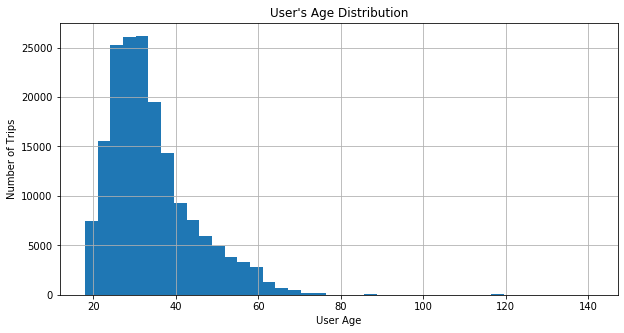

In [306]:
# Creating a histogram of the age column
plt.figure(figsize = (10,5))

fordbike['age'].hist(bins= 40);

plt.xlabel('User Age')
plt.ylabel('Number of Trips')
plt.title("User's Age Distribution")

plt.show()

> The chart shows that a majority of bike users in San Francisco are around 20-40 years old. The distribution is skewed to the left. The seems to be some outliers.

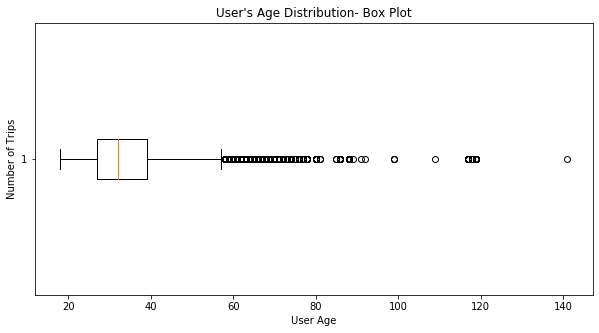

In [307]:
# Box plot of age so as to clearly see the outliers
plt.figure(figsize = (10,5))

plt.boxplot(fordbike['age'], vert=False)

plt.xlabel('User Age')
plt.ylabel('Number of Trips')
plt.title("User's Age Distribution- Box Plot")

plt.show()

> There are some outliers in the ages. There seems to be a 140 year old cyclist.

### 2. What is the distribution of the bike ride duration in minutes?

count    174952.000000
mean         11.241461
std          27.371269
min           1.000000
25%           5.000000
50%           8.000000
75%          13.000000
max        1409.000000
Name: duration_minute, dtype: float64


Text(0, 0.5, 'Number of Trips')

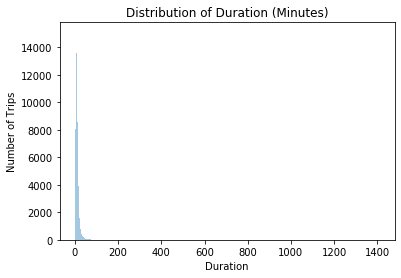

In [308]:
# A histogram of the duration in minutes
print((fordbike['duration_minute'].describe()))
bin_edges= np.arange(0, 1409+1, 1)
sb.distplot(fordbike['duration_minute'], bins=bin_edges, kde=False)

plt.title('Distribution of Duration (Minutes)')
plt.xlabel('Duration')
plt.ylabel('Number of Trips')

The distribution is not clear.Introduce logarithm so as to get a clearer distribution

C:\Users\Ruth Kibor\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  if sys.path[0] == '':


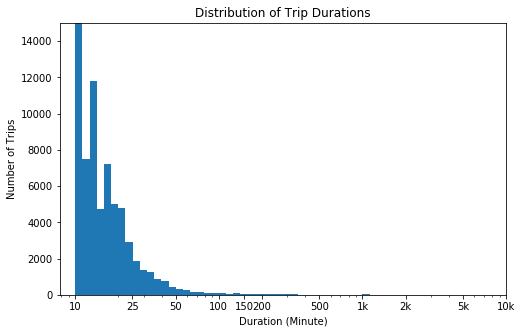

In [309]:
#Introducing logarithm so as to get a better visualizaton of the distribution
log_binsize = 0.05
log_bins = 10 ** np.arange(1, np.log10(fordbike['duration_minute'].max()) + log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = fordbike, x = 'duration_minute', bins = log_bins)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (Minute)')
plt.ylabel('Number of Trips')
plt.xscale('log')
plt.xticks([10,25,50,100,150,200,500, 1e3, 2e3, 5e3, 1e4], [10,25,50,100,150,200,500, '1k', '2k', '5k', '10k'])
plt.axis([0, 10000, 0, 15000])
plt.show()

The distribution is much clearer now. The data is skewed to the left. 

In [310]:
# a function for bar graphs
def bar_graph(col_name, title,x,y):
    base_color= sb.color_palette()[4]
    freq= fordbike[col_name].value_counts().index
    sb.countplot(data= fordbike, x=col_name, color= base_color, order=freq);

    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)


### 3. What is the gender distribution?


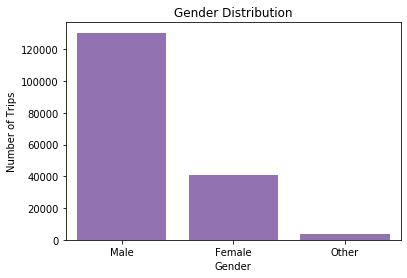

In [311]:
# A bar graph of the gender distribution
bar_graph('member_gender',"Gender Distribution","Gender",'Number of Trips')


> From the bar graph, a majority of the riders are male,followed by females and then other.

### 4. What is the distribution of the days that most people ride bikes?

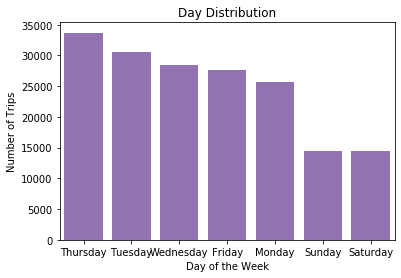

In [312]:
# A bar graph of the day distribution
bar_graph('day',"Day Distribution","Day of the Week",'Number of Trips')

> The day of the week with most rides is Thursday!

### 6. How many are in the trips sharing program?

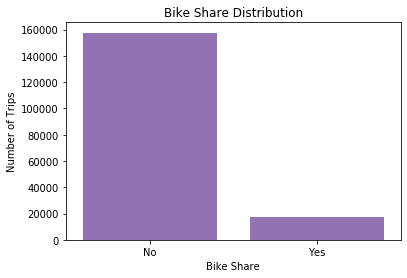

In [313]:
# A bar graph of the bikes shares
bar_graph('bike_share_for_all_trip','Bike Share Distribution','Bike Share', 'Number of Trips')

> Around 160,000 people did not participate in the bike share.

### 7. How many riders are subscribers?

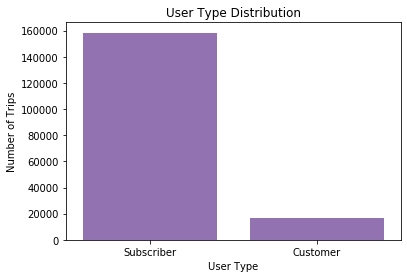

In [314]:
# A bar graph
bar_graph('user_type','User Type Distribution', 'User Type','Number of Trips')

> Majority of the riders are subscribers. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

- The age outlier was an unusual point at 140 years.
- For the duration distribution, I had to perform a logarithmic transformation to get a clearer visual of the distribution

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

- I included new columns such as the 'day' column. In order to do this, I had to separate the date and the time from the original start_time and end_time columns. I did this in order to know which day of the week had the most rides. 

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### 8. Which gender rides for the longest duration?

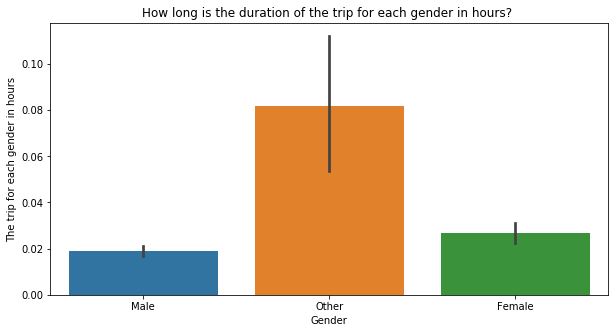

In [315]:
# A barplot of the member gender and duration in hours
plt.figure(figsize = (10,5))

sb.barplot(data = fordbike, x = "member_gender", y = "duration_hour")

plt.xlabel('Gender')

plt.ylabel('The trip for each gender in hours')


plt.title("How long is the duration of the trip for each gender in hours? ")

plt.show()

The gender with the longest ride duration is the 'Other' gender, followed by 'Female' and then 'Male'.

### 9. What is the relationship between age and the duration of the ride?

Text(0, 0.5, 'Duration(Hours)')

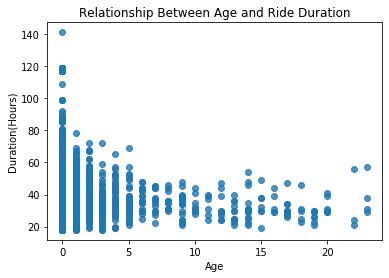

In [316]:
sb.regplot(data= fordbike, x='duration_hour',y='age', fit_reg= False);

plt.title('Relationship Between Age and Ride Duration')
plt.xlabel('Age')
plt.ylabel('Duration(Hours)')

The relationship from thig graph is not very clear. I'm going to use jitter and transparency to get a clearer picture pf the relationship. 

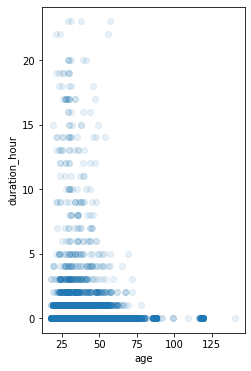

In [317]:
#Use of Jitter and Transparency to get a clearer relationship
plt.figure(figsize=[8,6])
plt.subplot(1,2,1)
sb.regplot(data=fordbike, x='age',y='duration_hour',x_jitter=0.04, scatter_kws={'alpha':1/10}, fit_reg= False)


Plenty of people between the age of 25-75 ride their bikes for a durration of less than an hour, however, a few people in this age group also ride their bikes for more than 20 hours. 

### 10. How many user types are in bike shares?

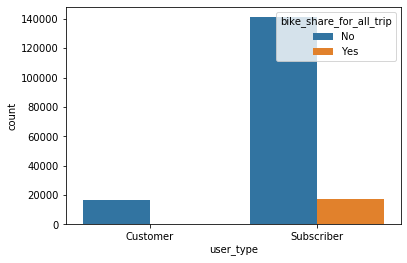

In [318]:
sb.countplot(data= fordbike, x='user_type', hue='bike_share_for_all_trip')


> Only subscribers are in the bikes shares

### 11. Relationship Between gender and user type

Text(0.5, 1, 'Relationship between Gender and User Type')

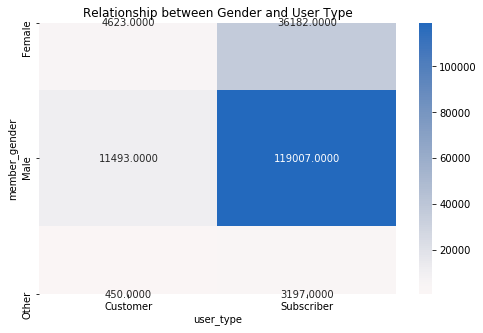

In [319]:
# A heat map of gender and user type
plt.figure(figsize=[8,5])
counts= fordbike.groupby(['member_gender', 'user_type']).size()
counts= counts.reset_index(name= 'count')
counts=counts.pivot(index='member_gender', columns='user_type', values= 'count');
sb.heatmap(counts, annot= True, fmt='.4f', cmap = 'vlag_r', center = 0)

plt.title('Relationship between Gender and User Type')



A large number of subscribers are male at 119,000. 

### 12. Age and User Type

Text(0, 0.5, 'Age')

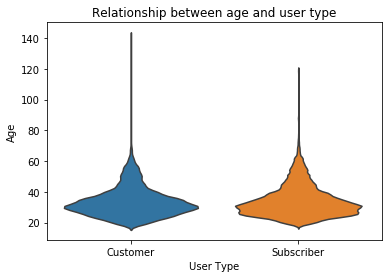

In [320]:
#A violin plot of age and user type
sb.violinplot(data= fordbike, x='user_type', y='age', inner= None);
plt.title('Relationship between age and user type')
plt.xlabel("User Type")
plt.ylabel("Age")

The median age of customers and subscribers is around 30 years. The customer group has an outlier of 140 years old while the subscriber has an outlier at around 120 years. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
- The median age of customers and subscribers is about the same at 30 years.
- The gender with the longest duration of rides is the Other. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
- Males make up majority of the subscribers.


## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### 13. What is the relationship between age, gender and duration of ride?

C:\Users\Ruth Kibor\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


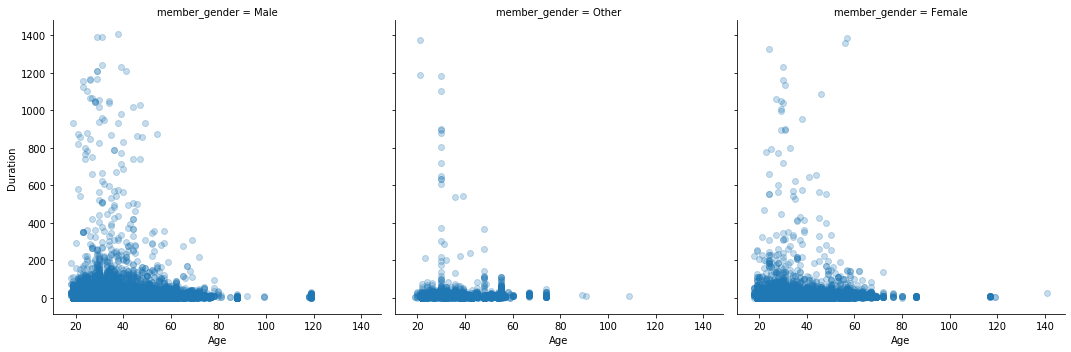

In [321]:
# create faceted scatter plot on levels of gender
g = sb.FacetGrid(data = fordbike, col = 'member_gender', col_wrap = 3, size = 5)
g.map(plt.scatter, 'age', 'duration_minute', alpha=0.25)
g.set_xlabels('Age')
g.set_ylabels('Duration')

plt.show()

From this faceted scatter plot, we can clearly see that the gender 'Other' has a young population of ridrs with a majority between 20 and 60. The outlier with 140 years of age is a female. We can also see that a lot more males ride longer durations compared to the other genders.

### 14. What is the Relationship between the numerical columns?

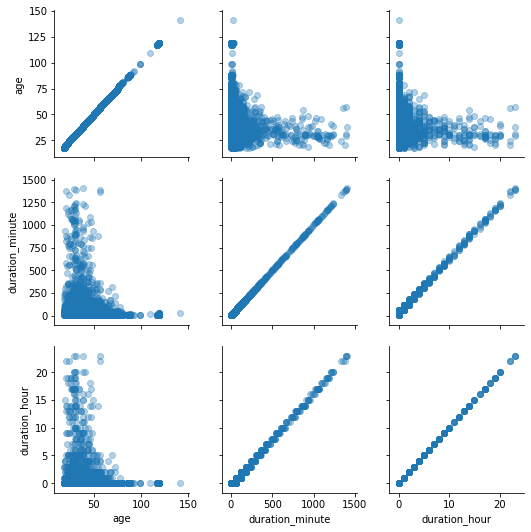

In [323]:
data_stat = ['age', 'duration_minute','duration_hour']
g = sb.PairGrid(data = fordbike, vars = data_stat ) ;
g.map(plt.scatter, alpha = 1/3);

## Conclusions
> In the data exploration, I found out:
- Thursday is the day with the most rides.
- Males make up the majority of subscribers in San Fransisco.
- Majority of the riders are subscribers.
- Males make up a large chunk of the riders.

> There are some limitations to our exploration:
- The data had to be modified

